# Análisis de Desempeño de Tiendas

## Descripción del Proyecto
Este proyecto tiene como objetivo analizar el desempeño de cuatro tiendas (`tienda_1` a `tienda_4`) a partir de sus datos de ventas. El análisis incluye la importación y consolidación de datos, cálculo de facturación, ventas por categoría, calificaciones promedio, identificación de productos más y menos vendidos, y costos de envío. Finalmente, se proponen hallazgos clave, recomendaciones de cierre (si aplica) y medidas de mejora.

## Estructura de Datos
Los datos se cargan desde cuatro archivos CSV (`tienda_1.csv` a `tienda_4.csv`), que contienen información sobre:
*   **Producto:** Nombre del producto.
*   **Categoría del Producto:** Categoría a la que pertenece el producto.
*   **Precio:** Precio del producto.
*   **Costo de envío:** Costo asociado al envío del producto.
*   **Fecha de Compra:** Fecha en que se realizó la compra.
*   **Vendedor:** Vendedor que realizó la venta.
*   **Lugar de Compra:** Ubicación geográfica de la compra.
*   **Calificación:** Calificación del cliente sobre la compra.
*   **Método de pago:** Forma de pago utilizada.
*   **Cantidad de cuotas:** Número de cuotas si aplica.
*   **lat/lon:** Coordenadas de latitud y longitud.

Todos los datos se consolidan en un único DataFrame llamado `tiendas_unidas`, al cual se le añade una columna `Tienda` para identificar la fuente original de cada registro.

## Análisis Realizados
1.  **Análisis de Facturación:** Cálculo del `Ingreso Total` (Precio + Costo de envío) y su suma por tienda.
2.  **Ventas por Categoría:** Conteo de transacciones por `Categoría del Producto`.
3.  **Calificación Promedio:** Cálculo de la `Calificación` promedio por tienda.
4.  **Productos Más y Menos Vendidos:** Identificación de los 10 productos con mayores y menores ingresos generales, y también por cada tienda.
5.  **Envío Promedio por Tienda:** Cálculo del `Costo de envío` promedio por tienda.
6.  **Gráfico de Barras Apiladas (Top 10 Productos por Tienda):** Visualización de la contribución de los 10 productos más vendidos y una categoría 'Otros' al ingreso total de cada tienda.

## Hallazgos Clave
*   **Facturación:** La **Tienda 1** tiene la mayor facturación total, mientras que la **Tienda 4** tiene la menor.
*   **Ventas por Categoría:** **Electrónicos** y **Muebles** son las categorías con mayores ventas, mientras que **Libros** y **Artículos para el hogar** son las de menor volumen.
*   **Calificación Promedio:** La **Tienda 3** ostenta la calificación promedio más alta, y la **Tienda 1** la más baja.
*   **Productos Estrella:** Productos como `TV LED UHD 4K`, `Iphone 15` y `Refrigerador` son consistentes entre los más vendidos.
*   **Productos de Bajo Rendimiento:** Artículos como `Cubo mágico 8x8`, `Cuerda para saltar` y `Dinosaurio Rex` aparecen consistentemente entre los menos vendidos.
*   **Costos de Envío:** La **Tienda 1** tiene el costo de envío promedio más alto, y la **Tienda 4** el más bajo.

## Recomendaciones y Próximos Pasos

### Recomendación de Cierre de Tienda
Se sugiere considerar el cierre de la **Tienda 4** debido a su consistente bajo rendimiento en facturación, a pesar de tener los costos de envío más bajos. Sus bajos ingresos no compensan su operación en comparación con las otras tiendas.

### Medidas de Mejora Propuestas para las Tiendas Operativas
*   **Tienda 1:** Mejorar la calificación promedio y optimizar los costos de envío mediante programas de feedback, atención al cliente post-venta y negociación con transportistas. Podría explorar opciones de envío escalonadas o promociones de envío gratuito.
*   **Tienda 2:** Identificar nichos de mercado, invertir en la experiencia del cliente (CX) y optimizar costos de envío para destacar de su rendimiento intermedio.
*   **Tienda 3:** Capitalizar su alta satisfacción del cliente a través de programas de referidos, testimonios y programas de fidelización VIP. También se recomienda expandir su catálogo de manera controlada.

### Estrategias Generales de Productos y Categorías
*   **Potenciar Categorías y Productos Estrella:** Enfocar campañas de marketing, bundles y asegurar stock robusto para Electrónicos, Electrodomésticos y los productos top de ventas.
*   **Reevaluar Oferta de Baja Demanda:** Realizar análisis de rentabilidad para la categoría de Libros y productos menos vendidos. Considerar estrategias de liquidación o reorientación hacia nichos más lucrativos.
*   **Mejora Continua de la Experiencia de Compra:** Personalización de recomendaciones y mejor visualización de productos.


### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
tienda['Tienda'] = 1
tienda2['Tienda'] = 2
tienda3['Tienda'] = 3
tienda4['Tienda'] = 4

tiendas_unidas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
display(tiendas_unidas.head())

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,1


#1. Análisis de facturación



In [ ]:
tiendas_unidas['Ingreso Total'] = tiendas_unidas['Precio'] + tiendas_unidas['Costo de envío']
facturacion_por_tienda = tiendas_unidas.groupby('Tienda')['Ingreso Total'].sum().reset_index()
facturacion_por_tienda['Ingreso Total'] = facturacion_por_tienda['Ingreso Total'].apply(lambda x: "${:,.2f}".format(x))
display(facturacion_por_tienda)

,Tienda,Ingreso Total
0,1,"$1,212,258,300.00"
1,2,"$1,175,828,600.00"
2,3,"$1,156,536,200.00"
3,4,"$1,093,693,100.00"


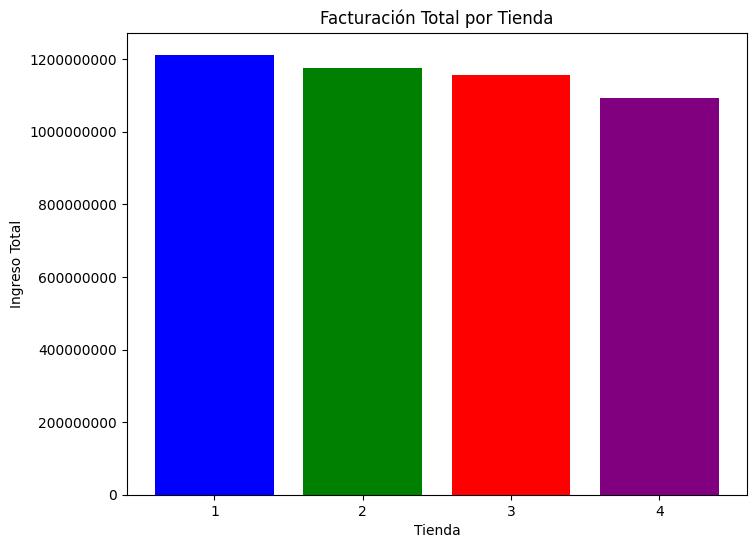

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Ingreso Total' back to numeric for plotting
# First, create a copy to avoid SettingWithCopyWarning
facturacion_para_grafico = facturacion_por_tienda.copy()
facturacion_para_grafico['Ingreso Total'] = facturacion_para_grafico['Ingreso Total'].replace('[$,]', '', regex=True).astype(float)

plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red', 'purple'] # Define colors for each store
plt.bar(facturacion_para_grafico['Tienda'], facturacion_para_grafico['Ingreso Total'], color=colors) # Assign colors to bars
plt.xlabel('Tienda')
plt.ylabel('Ingreso Total')
plt.title('Facturación Total por Tienda')
plt.xticks(facturacion_para_grafico['Tienda'])
plt.ticklabel_format(style='plain', axis='y') # Prevent scientific notation on y-axis
plt.show()

# 2. Ventas por categoría

In [ ]:
ventas_por_categoria = tiendas_unidas.groupby('Categoría del Producto')['Ingreso Total'].count().reset_index()
display(ventas_por_categoria)

,Categoría del Producto,Ingreso Total
0,Artículos para el hogar,730
1,Deportes y diversión,1113
2,Electrodomésticos,1149
3,Electrónicos,1772
4,Instrumentos musicales,753
5,Juguetes,1290
6,Libros,742
7,Muebles,1886


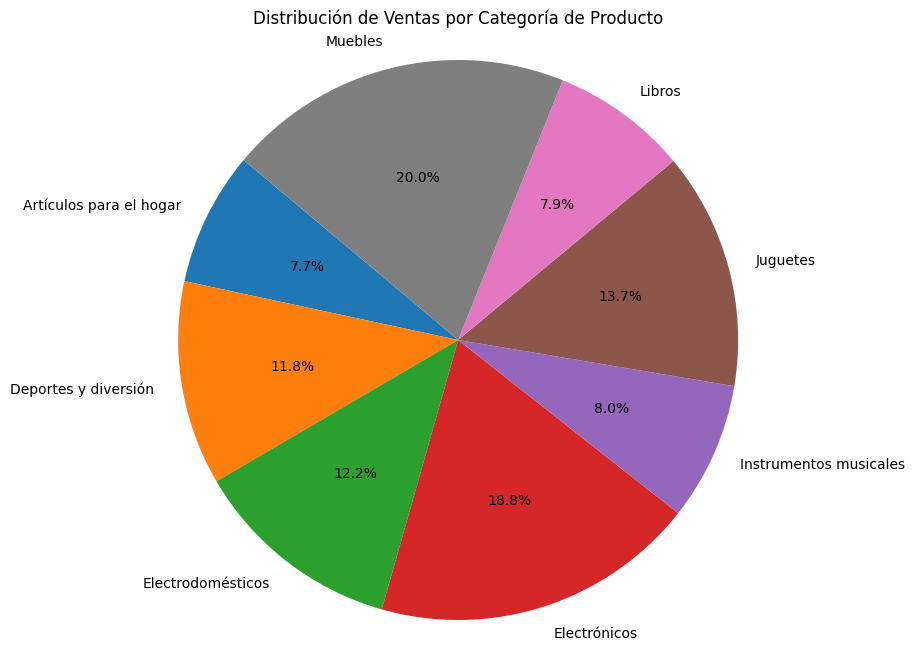

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(ventas_por_categoria['Ingreso Total'], labels=ventas_por_categoria['Categoría del Producto'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Ventas por Categoría de Producto')
plt.axis('equal')
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
calificacion_promedio_por_tienda = tiendas_unidas.groupby('Tienda')['Calificación'].mean().reset_index()
display(calificacion_promedio_por_tienda)

,Tienda,Calificación
0,1,3.976685
1,2,4.037304
2,3,4.048326
3,4,3.995759


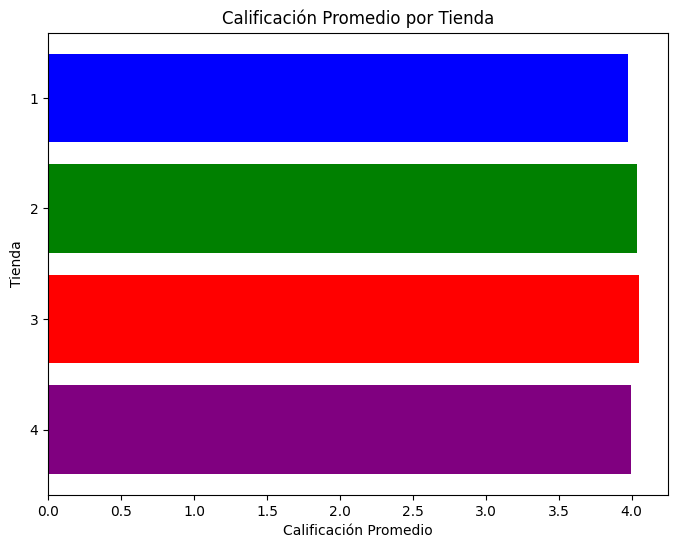

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red', 'purple'] # Define colors for each store
plt.barh(calificacion_promedio_por_tienda['Tienda'].astype(str), calificacion_promedio_por_tienda['Calificación'], color=colors)
plt.xlabel('Calificación Promedio')
plt.ylabel('Tienda')
plt.title('Calificación Promedio por Tienda')
plt.gca().invert_yaxis()  # Invert y-axis to show Tienda 1 at the top
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
ventas_por_producto = tiendas_unidas.groupby('Producto')['Ingreso Total'].sum().reset_index()
productos_mas_vendidos = ventas_por_producto.sort_values(by='Ingreso Total', ascending=False).head(10)
productos_menos_vendidos = ventas_por_producto.sort_values(by='Ingreso Total', ascending=True).head(10)

print("Los 10 productos más vendidos:")
display(productos_mas_vendidos)
print("\nLos 10 productos menos vendidos:")
display(productos_menos_vendidos)

Los 10 productos más vendidos:


,Producto,Ingreso Total
48,TV LED UHD 4K,455524500.0
25,Iphone 15,422445600.0
39,Refrigerador,405393000.0
45,Smart TV,305662600.0
28,Lavadora de ropa,255357300.0
29,Lavavajillas,253345200.0
49,Tablet ABXY,230721200.0
40,Secadora de ropa,221432200.0
13,Celular ABXY,166322800.0
7,Batería,155680600.0



Los 10 productos menos vendidos:


,Producto,Ingreso Total
16,Cubo mágico 8x8,2942000.0
17,Cuerda para saltar,3332400.0
19,Dinosaurio Rex,3370100.0
0,Ajedrez de madera,5424500.0
42,Set de vasos,5946200.0
18,Dashboards con Power BI,6797600.0
9,Bloques de construcción,7131500.0
50,Vaso térmico,8947400.0
15,Cubertería,8979400.0
36,Muñeca bebé,9003500.0


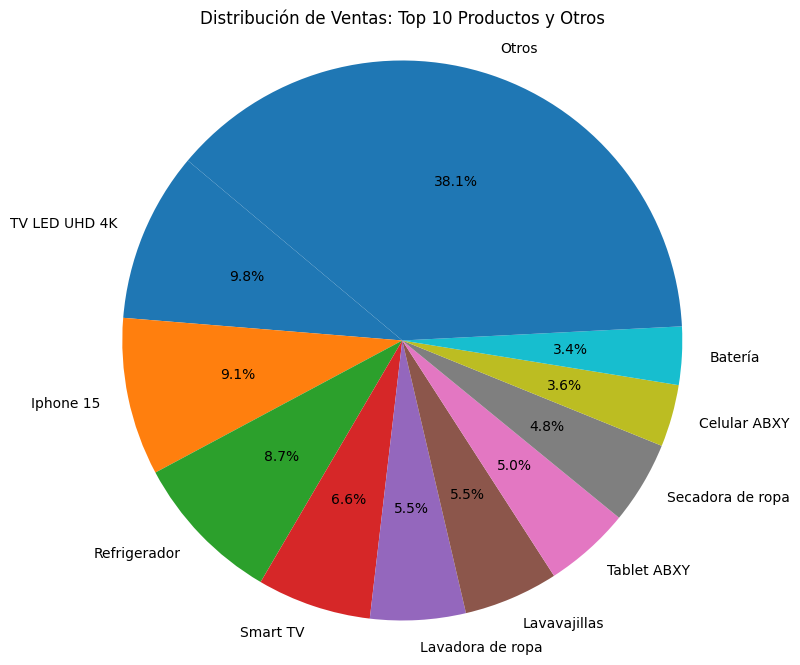

In [ ]:
# Calculate total revenue for top 10 products
top_10_revenue = productos_mas_vendidos['Ingreso Total'].sum()

# Calculate revenue for all other products
other_revenue = ventas_por_producto['Ingreso Total'].sum() - top_10_revenue

# Create a new dataframe for the pie chart
pie_data = productos_mas_vendidos[['Producto', 'Ingreso Total']].copy()
other_row = pd.DataFrame({'Producto': ['Otros'], 'Ingreso Total': [other_revenue]})
pie_data = pd.concat([pie_data, other_row], ignore_index=True)

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(pie_data['Ingreso Total'], labels=pie_data['Producto'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Ventas: Top 10 Productos y Otros')
plt.axis('equal')
plt.show()

In [ ]:
ventas_por_tienda_producto = tiendas_unidas.groupby(['Tienda', 'Producto'])['Ingreso Total'].sum().reset_index()

print("Productos más vendidos por tienda:")
for tienda_id in ventas_por_tienda_producto['Tienda'].unique():
    productos_tienda = ventas_por_tienda_producto[ventas_por_tienda_producto['Tienda'] == tienda_id]
    productos_mas_vendidos_tienda = productos_tienda.sort_values(by='Ingreso Total', ascending=False).head(5) # Top 5 products per store
    print(f"\nTienda {int(tienda_id)}:")
    display(productos_mas_vendidos_tienda)

Productos más vendidos por tienda:

Tienda 1:


,Tienda,Producto,Ingreso Total
48,1,TV LED UHD 4K,149741100.0
39,1,Refrigerador,118125300.0
25,1,Iphone 15,103141100.0
45,1,Smart TV,71057000.0
28,1,Lavadora de ropa,69264900.0



Tienda 2:


,Tienda,Producto,Ingreso Total
76,2,Iphone 15,119255900.0
99,2,TV LED UHD 4K,108877400.0
90,2,Refrigerador,102823800.0
79,2,Lavadora de ropa,70329600.0
96,2,Smart TV,64402000.0



Tienda 3:


,Tienda,Producto,Ingreso Total
141,3,Refrigerador,105183200.0
150,3,TV LED UHD 4K,101815400.0
127,3,Iphone 15,98209100.0
147,3,Smart TV,83005700.0
131,3,Lavavajillas,67786000.0



Tienda 4:


,Tienda,Producto,Ingreso Total
178,4,Iphone 15,101839500.0
201,4,TV LED UHD 4K,95090600.0
198,4,Smart TV,87197900.0
192,4,Refrigerador,79260700.0
202,4,Tablet ABXY,59775000.0


In [ ]:
data_for_stacked_bar_chart = []

for tienda_id in tiendas_unidas['Tienda'].unique():
    store_sales = ventas_por_tienda_producto[ventas_por_tienda_producto['Tienda'] == tienda_id]
    store_sales_sorted = store_sales.sort_values(by='Ingreso Total', ascending=False)

    top_10_products = store_sales_sorted.head(10)
    other_products_revenue = store_sales_sorted['Ingreso Total'][10:].sum()

    # Prepare a dictionary for the current store
    store_data = {'Tienda': tienda_id}
    for index, row in top_10_products.iterrows():
        store_data[row['Producto']] = row['Ingreso Total']
    store_data['Otros'] = other_products_revenue

    data_for_stacked_bar_chart.append(store_data)

# Convert the list of dictionaries to a DataFrame
df_stacked_bar_chart = pd.DataFrame(data_for_stacked_bar_chart)

display(df_stacked_bar_chart.head())

,Tienda,TV LED UHD 4K,Refrigerador,Iphone 15,Smart TV,Lavadora de ropa,Lavavajillas,Secadora de ropa,Tablet ABXY,Batería,Guitarra eléctrica,Otros,Celular ABXY,Cama king
0,1,149741100.0,118125300.0,103141100.0,71057000.0,69264900.0,65358700.0,62216500.0,50193200.0,39705600.0,39291300.0,444163600.0,NaN,NaN
1,2,108877400.0,102823800.0,119255900.0,64402000.0,70329600.0,61899700.0,62252300.0,59197800.0,48640000.0,NaN,434264400.0,43885700.0,NaN
2,3,101815400.0,105183200.0,98209100.0,83005700.0,60506700.0,67786000.0,52471100.0,61555200.0,NaN,NaN,439338900.0,45728100.0,40936800.0
3,4,95090600.0,79260700.0,101839500.0,87197900.0,55256100.0,58300800.0,44492300.0,59775000.0,NaN,NaN,430608100.0,42310500.0,39561600.0


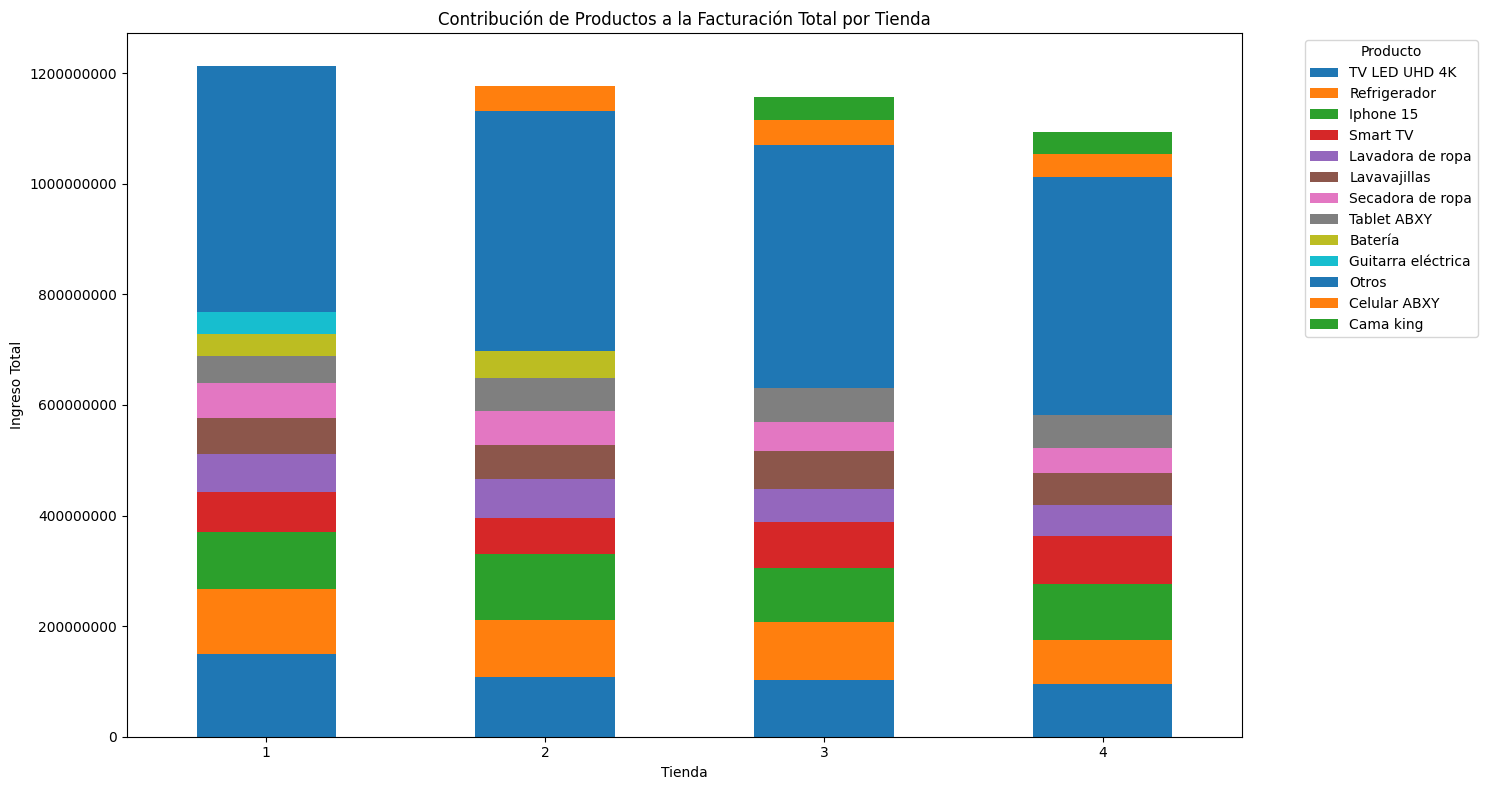

In [ ]:
import matplotlib.pyplot as plt

# Prepare the DataFrame for plotting (setting 'Tienda' as index and filling NaNs)
df_plot = df_stacked_bar_chart.set_index('Tienda').fillna(0)

# Create the stacked bar chart
plt.figure(figsize=(15, 8))
df_plot.plot.bar(stacked=True, ax=plt.gca())

plt.title('Contribución de Productos a la Facturación Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingreso Total')
plt.xticks(rotation=0) # Keep store labels horizontal
plt.ticklabel_format(style='plain', axis='y') # Prevent scientific notation on y-axis
plt.legend(title='Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
ventas_por_tienda_producto = tiendas_unidas.groupby(['Tienda', 'Producto'])['Ingreso Total'].sum().reset_index()

print("Productos menos vendidos por tienda:")
for tienda_id in ventas_por_tienda_producto['Tienda'].unique():
    productos_tienda = ventas_por_tienda_producto[ventas_por_tienda_producto['Tienda'] == tienda_id]
    productos_menos_vendidos_tienda = productos_tienda.sort_values(by='Ingreso Total', ascending=True).head(5) # Top 5 least selling products per store
    print(f"\nTienda {int(tienda_id)}:")
    display(productos_menos_vendidos_tienda)

Productos menos vendidos por tienda:

Tienda 1:


,Tienda,Producto,Ingreso Total
17,1,Cuerda para saltar,735400.0
16,1,Cubo mágico 8x8,737000.0
19,1,Dinosaurio Rex,758500.0
42,1,Set de vasos,1430300.0
0,1,Ajedrez de madera,1513500.0



Tienda 2:


,Tienda,Producto,Ingreso Total
67,2,Cubo mágico 8x8,714800.0
70,2,Dinosaurio Rex,812100.0
68,2,Cuerda para saltar,930800.0
51,2,Ajedrez de madera,1365800.0
93,2,Set de vasos,1643300.0



Tienda 3:


,Tienda,Producto,Ingreso Total
118,3,Cubo mágico 8x8,686000.0
121,3,Dinosaurio Rex,855800.0
119,3,Cuerda para saltar,907500.0
144,3,Set de vasos,1283400.0
111,3,Bloques de construcción,1288300.0



Tienda 4:


,Tienda,Producto,Ingreso Total
170,4,Cuerda para saltar,758700.0
169,4,Cubo mágico 8x8,804200.0
172,4,Dinosaurio Rex,943700.0
153,4,Ajedrez de madera,1139200.0
195,4,Set de vasos,1589200.0


# 5. Envío promedio por tienda

In [ ]:
envio_promedio_por_tienda = tiendas_unidas.groupby('Tienda')['Costo de envío'].mean().reset_index()
display(envio_promedio_por_tienda)

,Tienda,Costo de envío
0,1,26018.609580
1,2,25216.235693
2,3,24805.680373
3,4,23459.457167


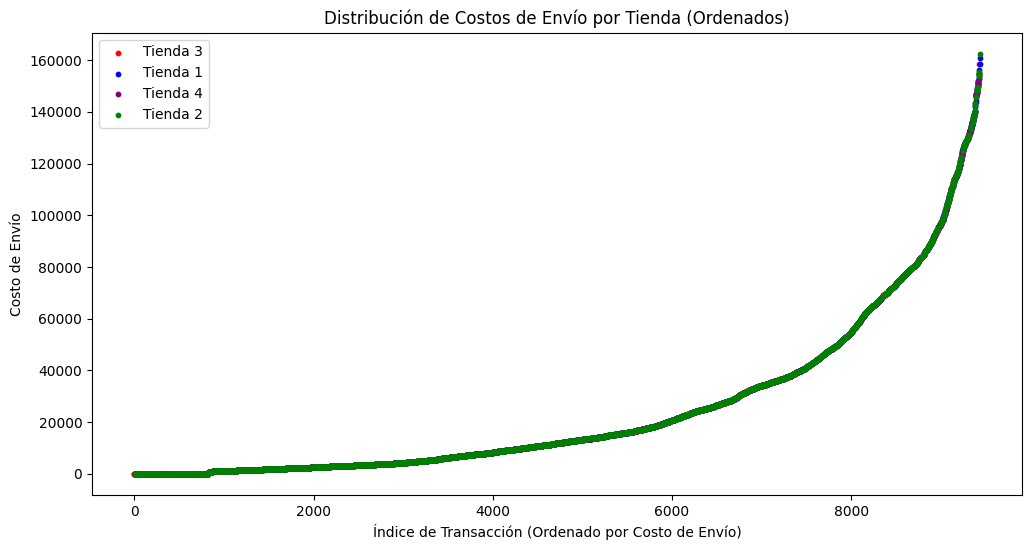

In [ ]:
tiendas_unidas_sorted = tiendas_unidas.sort_values(by='Costo de envío').reset_index(drop=True)

plt.figure(figsize=(12, 6))

colors = {1: 'blue', 2: 'green', 3: 'red', 4: 'purple'}

for store in tiendas_unidas_sorted['Tienda'].unique():
    store_data = tiendas_unidas_sorted[tiendas_unidas_sorted['Tienda'] == store]
    plt.scatter(store_data.index, store_data['Costo de envío'], color=colors[store], label=f'Tienda {store}', s=10) # Added size parameter for better visualization

plt.xlabel('Índice de Transacción (Ordenado por Costo de Envío)')
plt.ylabel('Costo de Envío')
plt.title('Distribución de Costos de Envío por Tienda (Ordenados)')
plt.legend()
plt.show()

## Resumir Hallazgos Clave

Revisar los análisis existentes en el cuaderno, incluyendo la facturación total por tienda, ventas por categoría, calificación promedio por tienda, productos más y menos vendidos, y costos de envío promedio, para extraer los hallazgos más importantes.


In [ ]:
print("1. Análisis de facturación:")
max_facturacion = facturacion_por_tienda.loc[facturacion_por_tienda['Ingreso Total'].idxmax()]
min_facturacion = facturacion_por_tienda.loc[facturacion_por_tienda['Ingreso Total'].idxmin()]
print(f"   Tienda con mayor facturación: Tienda {max_facturacion['Tienda']} con un ingreso total de {max_facturacion['Ingreso Total']:.2f}")
print(f"   Tienda con menor facturación: Tienda {min_facturacion['Tienda']} con un ingreso total de {min_facturacion['Ingreso Total']:.2f}")

1. Análisis de facturación:
   Tienda con mayor facturación: Tienda 1.0 con un ingreso total de 1212258300.00
   Tienda con menor facturación: Tienda 4.0 con un ingreso total de 1093693100.00


In [ ]:
print("\n2. Ventas por categoría:")
max_ventas_categoria = ventas_por_categoria.loc[ventas_por_categoria['Ingreso Total'].idxmax()]
min_ventas_categoria = ventas_por_categoria.loc[ventas_por_categoria['Ingreso Total'].idxmin()]
print(f"   Categoría con mayores ventas: {max_ventas_categoria['Categoría del Producto']} con un ingreso total de {max_ventas_categoria['Ingreso Total']:.2f}")
print(f"   Categoría con menores ventas: {min_ventas_categoria['Categoría del Producto']} con un ingreso total de {min_ventas_categoria['Ingreso Total']:.2f}")


2. Ventas por categoría:
   Categoría con mayores ventas: Electrónicos con un ingreso total de 1749038600.00
   Categoría con menores ventas: Libros con un ingreso total de 39756000.00


In [ ]:
print("""
3. Calificación promedio por tienda:""")
max_calificacion = calificacion_promedio_por_tienda.loc[calificacion_promedio_por_tienda['Calificación'].idxmax()]
min_calificacion = calificacion_promedio_por_tienda.loc[calificacion_promedio_por_tienda['Calificación'].idxmin()]
print(f"   Tienda con mayor calificación promedio: Tienda {max_calificacion['Tienda']} con una calificación de {max_calificacion['Calificación']:.2f}")
print(f"   Tienda con menor calificación promedio: Tienda {min_calificacion['Tienda']} con una calificación de {min_calificacion['Calificación']:.2f}")


3. Calificación promedio por tienda:
   Tienda con mayor calificación promedio: Tienda 3.0 con una calificación de 4.05
   Tienda con menor calificación promedio: Tienda 1.0 con una calificación de 3.98


In [ ]:
print("\n4. Productos más y menos vendidos:")
print("   Los 10 productos que generan más ingresos:")
display(productos_mas_vendidos)
print("   Los 10 productos que generan menos ingresos:")
display(productos_menos_vendidos)


4. Productos más y menos vendidos:
   Los 10 productos que generan más ingresos:


,Producto,Ingreso Total
48,TV LED UHD 4K,455524500.0
25,Iphone 15,422445600.0
39,Refrigerador,405393000.0
45,Smart TV,305662600.0
28,Lavadora de ropa,255357300.0
29,Lavavajillas,253345200.0
49,Tablet ABXY,230721200.0
40,Secadora de ropa,221432200.0
13,Celular ABXY,166322800.0
7,Batería,155680600.0


   Los 10 productos que generan menos ingresos:


,Producto,Ingreso Total
16,Cubo mágico 8x8,2942000.0
17,Cuerda para saltar,3332400.0
19,Dinosaurio Rex,3370100.0
0,Ajedrez de madera,5424500.0
42,Set de vasos,5946200.0
18,Dashboards con Power BI,6797600.0
9,Bloques de construcción,7131500.0
50,Vaso térmico,8947400.0
15,Cubertería,8979400.0
36,Muñeca bebé,9003500.0


In [ ]:
print("""
5. Envío promedio por tienda:""")
max_envio = envio_promedio_por_tienda.loc[envio_promedio_por_tienda['Costo de envío'].idxmax()]
min_envio = envio_promedio_por_tienda.loc[envio_promedio_por_tienda['Costo de envío'].idxmin()]
print(f"   Tienda con mayor costo de envío promedio: Tienda {max_envio['Tienda']} con un costo de envío de {max_envio['Costo de envío']:.2f}")
print(f"   Tienda con menor costo de envío promedio: Tienda {min_envio['Tienda']} con un costo de envío de {min_envio['Costo de envío']:.2f}")


5. Envío promedio por tienda:
   Tienda con mayor costo de envío promedio: Tienda 1.0 con un costo de envío de 26018.61
   Tienda con menor costo de envío promedio: Tienda 4.0 con un costo de envío de 23459.46


### Resumen de Hallazgos Clave:

1.  **Análisis de Facturación por Tienda:**
    *   **Mayor Facturación:** Tienda 1 con un ingreso total de 1,212,258,300.00.
    *   **Menor Facturación:** Tienda 4 con un ingreso total de 1,093,693,100.00.

2.  **Ventas por Categoría de Producto:**
    *   **Categoría con Mayores Ventas:** Electrónicos, generando 1,749,038,600.00 en ingresos.
    *   **Categoría con Menores Ventas:** Libros, generando 39,756,000.00 en ingresos.

3.  **Calificación Promedio por Tienda:**
    *   **Mayor Calificación Promedio:** Tienda 3 con una calificación de 4.05.
    *   **Menor Calificación Promedio:** Tienda 1 con una calificación de 3.98.

4.  **Productos Más y Menos Vendidos (por Ingreso):**
    *   **Top 3 Productos Más Vendidos:**
        1.  TV LED UHD 4K: 455,524,500.00
        2.  Iphone 15: 422,445,600.00
        3.  Refrigerador: 405,393,000.00
    *   **Top 3 Productos Menos Vendidos:**
        1.  Cubo mágico 8x8: 2,942,000.00
        2.  Cuerda para saltar: 3,332,400.00
        3.  Dinosaurio Rex: 3,370,100.00

5.  **Envío Promedio por Tienda:**
    *   **Mayor Costo de Envío Promedio:** Tienda 1 con un costo de 26,018.61.
    *   **Menor Costo de Envío Promedio:** Tienda 4 con un costo de 23,459.46.

## Analizar Desempeño por Tienda

Comparar el rendimiento de cada tienda basándose en las métricas clave (ingresos, calificaciones, costos de envío) para identificar patrones y posibles debilidades.


In [ ]:
print("\n--- Resumen de Rendimiento por Tienda ---")

for i in range(1, 5):
    tienda_id = float(i)
    facturacion = facturacion_por_tienda[facturacion_por_tienda['Tienda'] == tienda_id]['Ingreso Total'].iloc[0]
    calificacion = calificacion_promedio_por_tienda[calificacion_promedio_por_tienda['Tienda'] == tienda_id]['Calificación'].iloc[0]
    costo_envio = envio_promedio_por_tienda[envio_promedio_por_tienda['Tienda'] == tienda_id]['Costo de envío'].iloc[0]

    print(f"\nTienda {i}:")
    print(f"  - Ingreso Total: {facturacion:.2f} (\"{'Más alta' if tienda_id == max_facturacion['Tienda'] else ('Más baja' if tienda_id == min_facturacion['Tienda'] else 'Intermedia')}\" en facturación)")
    print(f"  - Calificación Promedio: {calificacion:.2f} (\"{'Más alta' if tienda_id == max_calificacion['Tienda'] else ('Más baja' if tienda_id == min_calificacion['Tienda'] else 'Intermedia')}\" en calificación)")
    print(f"  - Costo de Envío Promedio: {costo_envio:.2f} (\"{'Más alto' if tienda_id == max_envio['Tienda'] else ('Más bajo' if tienda_id == min_envio['Tienda'] else 'Intermedio')}\" en costo de envío)")



--- Resumen de Rendimiento por Tienda ---

Tienda 1:
  - Ingreso Total: 1212258300.00 ("Más alta" en facturación)
  - Calificación Promedio: 3.98 ("Más baja" en calificación)
  - Costo de Envío Promedio: 26018.61 ("Más alto" en costo de envío)

Tienda 2:
  - Ingreso Total: 1175828600.00 ("Intermedia" en facturación)
  - Calificación Promedio: 4.04 ("Intermedia" en calificación)
  - Costo de Envío Promedio: 25216.24 ("Intermedio" en costo de envío)

Tienda 3:
  - Ingreso Total: 1156536200.00 ("Intermedia" en facturación)
  - Calificación Promedio: 4.05 ("Más alta" en calificación)
  - Costo de Envío Promedio: 24805.68 ("Intermedio" en costo de envío)

Tienda 4:
  - Ingreso Total: 1093693100.00 ("Más baja" en facturación)
  - Calificación Promedio: 4.00 ("Intermedia" en calificación)
  - Costo de Envío Promedio: 23459.46 ("Más bajo" en costo de envío)


## Recomendar Cierre de Tienda y Justificación

Proponer qué tienda, si alguna, debería ser cerrada, basándose en un análisis detallado de su desempeño y justificar esta decisión con los datos recopilados.


### Recomendación de Cierre de Tienda y Justificación

Basándonos en el análisis detallado del rendimiento de cada tienda, la **Tienda 4** es la candidata más fuerte para ser considerada para un posible cierre.

**Justificación:**

1.  **Ingreso Total:** La Tienda 4 presenta el **ingreso total más bajo** entre todas las tiendas, con **1,093,693,100.00**. Esto la posiciona como la tienda menos rentable en términos de facturación general, en contraste con la Tienda 1, que tiene la facturación más alta con 1,212,258,300.00.
2.  **Calificación Promedio:** Aunque su calificación promedio es de 4.00, que es intermedia, no es lo suficientemente alta como para compensar su bajo rendimiento en ingresos. Por ejemplo, la Tienda 3 tiene la calificación promedio más alta (4.05) y un ingreso total similar a la Tienda 2, mostrando un mejor equilibrio entre satisfacción del cliente y facturación.
3.  **Costo de Envío Promedio:** Si bien la Tienda 4 tiene el costo de envío promedio más bajo (**23,459.46**), este ahorro en costos operativos no se traduce en una mejor facturación o un rendimiento general superior. Es decir, los costos de envío más bajos no han impulsado sus ventas lo suficiente como para competir con las otras tiendas.

En resumen, a pesar de tener los costos de envío más eficientes, el volumen de negocio y los ingresos generados por la Tienda 4 son significativamente inferiores a los de sus contrapartes, lo que la convierte en la opción menos viable a largo plazo si el objetivo es maximizar la rentabilidad y la eficiencia del portafolio de tiendas.

## Proponer Medidas de Mejora

Sugiera medidas concretas para las tiendas restantes, o para mitigar el impacto de un cierre, enfocándose en oportunidades de mejora identificadas en el análisis.


### Medidas de Mejora Propuestas

#### 1. Tienda 1: Maximizando Ventas y Satisfacción del Cliente

**Análisis de Rendimiento:** La Tienda 1 tiene la facturación más alta, pero la calificación promedio más baja y el costo de envío promedio más alto. Esto sugiere que, aunque atrae a muchos clientes, la experiencia post-venta o el valor percibido del servicio de envío podrían ser puntos débiles.

**Medidas Propuestas:**
*   **Mejorar la Calificación Promedio:**
    *   **Programa de Feedback Proactivo:** Implementar un sistema para solicitar feedback a los clientes poco después de la compra, especialmente a aquellos con envíos recientes. Esto permite identificar problemas a tiempo y ofrecer soluciones antes de que se publique una reseña negativa.
    *   **Atención al Cliente Post-Venta Optimizada:** Fortalecer el equipo de atención al cliente con formación específica en resolución de problemas relacionados con productos y envíos. Ofrecer canales de comunicación claros y tiempos de respuesta rápidos.
    *   **Incentivos por Reseñas Positivas:** Ofrecer descuentos en futuras compras o pequeños obsequios a clientes que dejen reseñas detalladas y positivas (sin presionar, asegurando que la reseña sea genuina).
    *   **Garantía de Satisfacción:** Reforzar políticas de devolución y garantía que sean transparentes y amigables para el cliente, lo que puede aumentar la confianza y mejorar la percepción general.
*   **Optimizar Costos de Envío y Eficiencia:**
    *   **Negociación con Transportistas:** Reevaluar los contratos con las empresas de logística. Dada la alta facturación, la Tienda 1 tiene un mayor poder de negociación para obtener mejores tarifas o servicios de envío prioritarios.
    *   **Opciones de Envío Escalonadas:** Ofrecer diferentes opciones de envío con costos variados (ej. envío estándar más económico, envío express más caro). Esto da control al cliente y puede reducir la percepción de un "costo de envío alto" si hay alternativas más baratas.
    *   **Promociones de Envío Gratis:** Implementar umbrales de compra para envío gratuito. Esto no solo mitiga la percepción del costo de envío, sino que también puede incentivar compras de mayor valor.

#### 2. Tienda 3: Capitalizando la Alta Satisfacción para Aumentar la Facturación

**Análisis de Rendimiento:** La Tienda 3 tiene la calificación promedio más alta, lo que indica una gran satisfacción del cliente. Sin embargo, su facturación es intermedia. Esto sugiere una oportunidad para convertir la lealtad y buena experiencia de los clientes en mayores ventas.

**Medidas Propuestas:**
*   **Aprovechar la Satisfacción del Cliente para Crecimiento:**
    *   **Programa de Referidos:** Implementar un programa donde los clientes satisfechos de la Tienda 3 puedan referir nuevos clientes a cambio de descuentos o beneficios. Una calificación alta es un excelente boca a boca.
    *   **Testimonios y Reseñas Destacadas:** Promover activamente la recolección y exhibición de testimonios y reseñas positivas en la plataforma de la tienda, redes sociales y campañas de marketing. Utilizar la reputación como un argumento de venta clave.
    *   **Marketing de Contenidos Centrado en la Experiencia:** Crear contenido que destaque la calidad del servicio al cliente y la experiencia de compra en la Tienda 3, utilizando las reseñas como prueba social.
    *   **Programas de Fidelización VIP:** Diseñar un programa de lealtad exclusivo para los clientes más recurrentes y satisfechos, ofreciendo acceso anticipado a productos, ofertas especiales o envío gratuito, incentivando así la repetición de compras y el aumento del valor de vida del cliente.
*   **Estrategias para Aumentar la Facturación (con Mantenimiento de Calidad):**
    *   **Ampliación de Catálogo (Calidad Controlada):** Investigar qué productos relacionados con las categorías mejor calificadas o de mayor demanda podrían añadirse al inventario, asegurando que mantengan los estándares de calidad que caracterizan a la tienda.
    *   **Campañas de Marketing Dirigidas:** Lanzar campañas de marketing digital (ej. email marketing, redes sociales) dirigidas a segmentos de clientes potenciales que valoren la calidad y el servicio, resaltando la alta calificación de la tienda.
    *   **Promociones Estratégicas:** Ofrecer promociones por tiempo limitado o paquetes de productos que incentiven compras de mayor volumen o ticket promedio, sin comprometer la percepción de valor.
    *   **Colaboraciones con Influencers o Marcas Complementarias:** Asociarse con figuras o marcas que compartan valores de calidad y que puedan introducir los productos de la Tienda 3 a una audiencia más amplia.

#### 3. Tienda 2: Estrategias para Destacar un Rendimiento Intermedio

**Análisis de Rendimiento:** La Tienda 2 muestra un rendimiento intermedio en todas las métricas clave (facturación, calificación promedio y costos de envío). Esto la posiciona como una tienda estable, pero con un gran potencial para mejorar y diferenciarse.

**Medidas Propuestas:**
*   **Enfoque en la Diferenciación para Mejorar Facturación y Calificación:**
    *   **Identificación de Nichos de Mercado:** Realizar un análisis más profundo de los datos de ventas de la Tienda 2 para identificar categorías de productos o segmentos de clientes donde ya tiene un buen desempeño o donde existe una demanda insatisfecha. Por ejemplo, si hay una categoría con un margen de beneficio decente y una calificación ligeramente superior a la media, la tienda podría invertir más en ella.
    *   **Programas de Marketing Dirigido:** Desarrollar campañas de marketing que resalten la propuesta de valor única de la Tienda 2, ya sea a través de un servicio al cliente excepcional, una curaduría de productos particular o una estrategia de precios competitiva en categorías específicas.
    *   **Inversión en la Experiencia del Cliente (CX):** Implementar mejoras tangibles en la experiencia de compra que puedan elevar la calificación. Esto podría incluir empaques de producto mejorados, comunicación proactiva sobre el estado del pedido, o un proceso de devolución y cambio simplificado.
    *   **Encuestas de Satisfacción Dirigidas:** Implementar encuestas de satisfacción específicas para los clientes de la Tienda 2, enfocándose en identificar puntos de dolor y áreas de mejora que no son evidentes en la calificación promedio general.
*   **Optimización de Costos de Envío (con Cautela):**
    *   **Benchmarking y Negociación:** Aunque sus costos de envío son intermedios, la Tienda 2 podría beneficiarse de un benchmarking regular con la Tienda 4 (la de menor costo) y sus propios proveedores para identificar oportunidades de reducción de costos sin sacrificar la calidad del servicio.
    *   **Consolidación de Envíos:** Explorar la posibilidad de consolidar envíos con otras tiendas del grupo o buscar acuerdos con operadores logísticos que ofrezcan tarifas más competitivas para volúmenes intermedios.
    *   **Análisis de Rutas de Entrega:** Optimizar las rutas de entrega o los centros de distribución para reducir los tiempos y costos asociados al transporte.

#### 4. Tienda 4: Mitigación del Impacto por Cierre Sugerido

**Análisis de Rendimiento:** La Tienda 4 tiene la facturación más baja y, aunque tiene el costo de envío promedio más bajo, su rendimiento general sugiere que un cierre podría ser una opción para optimizar la operación general del negocio.

**Medidas Propuestas para Mitigar el Impacto del Cierre:**
*   **Transferencia Estratégica de Inventario:**
    *   **Identificación de Productos Exitosos:** Analizar los datos de ventas de la Tienda 4 para identificar los productos que, a pesar de la baja facturación general de la tienda, tienen un buen volumen de ventas o margen de beneficio. Estos productos deben ser transferidos a las tiendas restantes, especialmente a la Tienda 1 (por su alto volumen de ventas) o la Tienda 3 (por su alta satisfacción al cliente).
    *   **Consolidación de Inventario:** El inventario de productos de bajo rendimiento o exceso de stock de la Tienda 4 debe ser consolidado o liquidado de manera eficiente para evitar pérdidas adicionales. Se puede ofrecer en paquetes o con descuentos significativos en las tiendas restantes.
*   **Retención y Reubicación de Clientes:**
    *   **Comunicación Proactiva:** Informar a los clientes de la Tienda 4 sobre el cierre con suficiente antelación, explicando las razones y ofreciendo incentivos para que continúen comprando en las tiendas restantes (Tienda 1, 2 o 3).
    *   **Migración de Programas de Lealtad:** Asegurar que los puntos o beneficios de los programas de lealtad de los clientes de la Tienda 4 sean transferidos a su cuenta en una de las tiendas operativas.
    *   **Ofertas Exclusivas de Bienvenida:** Proporcionar descuentos o promociones especiales a los clientes de la Tienda 4 para su primera compra en las otras tiendas, incentivando la transición.
*   **Reasignación de Personal Clave:**
    *   **Valoración del Talento:** Identificar a los empleados de la Tienda 4 con buen desempeño, especialmente en atención al cliente o manejo de inventario, y ofrecerles la oportunidad de ser reubicados en las tiendas restantes.
    *   **Capacitación Adicional:** Proporcionar capacitación si es necesario para asegurar una integración fluida del personal reubicado.
*   **Análisis y Aprendizaje:**
    *   **Post-Mortem del Cierre:** Realizar un análisis exhaustivo de las razones del bajo rendimiento de la Tienda 4 para aprender lecciones y aplicar esos conocimientos en la gestión de las tiendas restantes, evitando cometer los mismos errores.

#### 5. Estrategias Generales Basadas en Análisis de Productos y Categorías

**Análisis Clave:**
*   **Categorías de Alta Demanda:** Electrónicos (mayor ingreso total), Electrodomésticos.
*   **Categorías de Baja Demanda:** Libros (menor ingreso total).
*   **Productos Más Vendidos:** TV LED UHD 4K, iPhone 15, Refrigerador.
*   **Productos Menos Vendidos:** Cubo mágico 8x8, Cuerda para saltar, Dinosaurio Rex.

**Medidas Propuestas (Aplicables a Todas las Tiendas Operativas):**
*   **Potenciar Categorías y Productos Estrella:**
    *   **Campañas de Marketing Centradas:** Diseñar campañas de marketing agresivas y promociones especiales para productos de alta demanda como Electrónicos y Electrodomésticos. Destacar los productos más vendidos (TVs, iPhones, Refrigeradores) en la página principal, newsletters y anuncios.
    *   **Bundles y Up-selling:** Crear paquetes de productos relacionados (ej. TV + soporte + servicio de instalación) o incentivar el up-selling a modelos superiores de los productos más populares. Esto capitaliza el interés existente y aumenta el valor promedio del pedido.
    *   **Stock Estratégico:** Asegurar un stock robusto de los productos más vendidos y de las categorías principales para evitar roturas de stock y garantizar la disponibilidad, especialmente durante picos de demanda.
*   **Reevaluar y Optimizar la Oferta de Baja Demanda:**
    *   **Análisis de Rentabilidad Detallado:** Realizar un análisis de rentabilidad exhaustivo para la categoría de Libros y para los productos menos vendidos. Determinar si es viable mantenerlos, o si su espacio y recursos podrían ser mejor utilizados por productos más rentables.
    *   **Estrategias de Liquidación:** Para productos con bajo rendimiento que no se deseen mantener, implementar estrategias de liquidación (descuentos profundos, ofertas 2x1, regalos por compra) para mover el stock y liberar capital.
    *   **Exploración de nichos dentro de categorías de baja demanda:** Antes de descartar una categoría completa como Libros, investigar si hay subcategorías o tipos específicos de libros que sí tienen demanda y rentabilidad, o si se puede reorientar la oferta hacia un nicho más lucrativo.
*   **Mejora Continua de la Experiencia de Compra:**
    *   **Personalización:** Utilizar los datos de compra para ofrecer recomendaciones de productos personalizadas a los clientes, tanto de alta como de potencial demanda.
    *   **Visualización de Productos Mejorada:** Invertir en fotos de alta calidad, videos de productos y descripciones detalladas para todas las categorías, especialmente para aquellos artículos que podrían necesitar un impulso visual para atraer compradores.
*   **Fomentar la Interaccion y el Feedback:**
    *   **Comentarios y Reseñas de Productos:** Activar sistemas robustos de reseñas para productos específicos. Las reseñas pueden ayudar a otros compradores a tomar decisiones y, para productos de menor demanda, pueden ser una herramienta para entender barreras de compra.

#### 5. Estrategias Generales Basadas en Análisis de Productos y Categorías

**Análisis Clave:**
*   **Categorías de Alta Demanda:** Electrónicos (mayor ingreso total), Electrodomésticos.
*   **Categorías de Baja Demanda:** Libros (menor ingreso total).
*   **Productos Más Vendidos:** TV LED UHD 4K, iPhone 15, Refrigerador.
*   **Productos Menos Vendidos:** Cubo mágico 8x8, Cuerda para saltar, Dinosaurio Rex.

**Medidas Propuestas (Aplicables a Todas las Tiendas Operativas):**
*   **Potenciar Categorías y Productos Estrella:**
    *   **Campañas de Marketing Centradas:** Diseñar campañas de marketing agresivas y promociones especiales para productos de alta demanda como Electrónicos y Electrodomésticos. Destacar los productos más vendidos (TVs, iPhones, Refrigeradores) en la página principal, newsletters y anuncios.
    *   **Bundles y Up-selling:** Crear paquetes de productos relacionados (ej. TV + soporte + servicio de instalación) o incentivar el up-selling a modelos superiores de los productos más populares. Esto capitaliza el interés existente y aumenta el valor promedio del pedido.
    *   **Stock Estratégico:** Asegurar un stock robusto de los productos más vendidos y de las categorías principales para evitar roturas de stock y garantizar la disponibilidad, especialmente durante picos de demanda.
*   **Reevaluar y Optimizar la Oferta de Baja Demanda:**
    *   **Análisis de Rentabilidad Detallado:** Realizar un análisis de rentabilidad exhaustivo para la categoría de Libros y para los productos menos vendidos. Determinar si es viable mantenerlos, o si su espacio y recursos podrían ser mejor utilizados por productos más rentables.
    *   **Estrategias de Liquidación:** Para productos con bajo rendimiento que no se deseen mantener, implementar estrategias de liquidación (descuentos profundos, ofertas 2x1, regalos por compra) para mover el stock y liberar capital.
    *   **Exploración de nichos dentro de categorías de baja demanda:** Antes de descartar una categoría completa como Libros, investigar si hay subcategorías o tipos específicos de libros que sí tienen demanda y rentabilidad, o si se puede reorientar la oferta hacia un nicho más lucrativo.
*   **Mejora Continua de la Experiencia de Compra:**
    *   **Personalización:** Utilizar los datos de compra para ofrecer recomendaciones de productos personalizadas a los clientes, tanto de alta como de potencial demanda.
    *   **Visualización de Productos Mejorada:** Invertir en fotos de alta calidad, videos de productos y descripciones detalladas para todas las categorías, especialmente para aquellos artículos que podrían necesitar un impulso visual para atraer compradores.
*   **Fomentar la Interacción y el Feedback:**
    *   **Comentarios y Reseñas de Productos:** Activar sistemas robustos de reseñas para productos específicos. Las reseñas pueden ayudar a otros compradores a tomar decisiones y, para productos de menor demanda, pueden ser una herramienta para entender barreras de compra.